In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt


In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()



In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

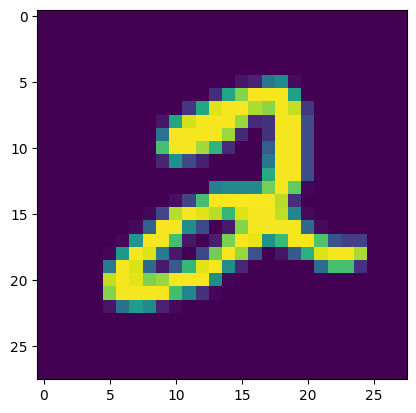

In [5]:
plt.imshow(X_train[5])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [9]:
# model = tf.keras.applications.ResNet152(
#     include_top=True,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=None,
#     pooling=None,
#     classes=1000,
# )

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 18s 11ms/step - loss: 0.2914 - accuracy: 0.9149 - val_loss: 0.1575 - val_accuracy: 0.9540
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1230 - accuracy: 0.9640 - val_loss: 0.1167 - val_accuracy: 0.9649
Epoch 3/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0865 - accuracy: 0.9736 - val_loss: 0.1033 - val_accuracy: 0.9680
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0650 - accuracy: 0.9803 - val_loss: 0.0885 - val_accuracy: 0.9747
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0502 - accuracy: 0.9845 - val_loss: 0.0997 - val_accuracy: 0.9734
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0403 - accuracy: 0.9869 - val_loss: 0.0971 - val_accuracy: 0.9722
Epoch 7/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0318 - accuracy: 0.9898 - val_loss: 0.0966 - val_accurac

In [15]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [16]:
y_pred = y_prob.argmax(axis=1)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9741

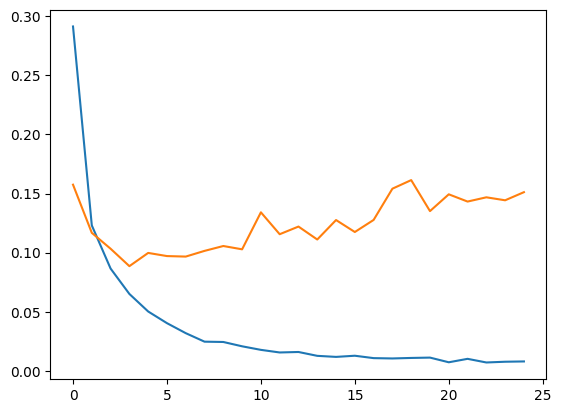

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])